# Customer Segmentation and Sales Analysis for E-commerce Platform

In this project, you will analyze customer behavior and sales data for an e-commerce platform to gain insights into customer segmentation, purchasing patterns, and revenue trends. 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Load the dataset

df = pd.read_csv('ecommerce_sales_data.csv')

print(df.to_string()) 

    CustomerID        Date  ProductID          ProductName       Category  Price  Quantity  TotalPrice  Country
0         1001  2023-01-01        101               Laptop    Electronics    800         1         800      USA
1         1002  2023-01-01        102              T-shirt       Clothing     20         2          40      USA
2         1003  2023-01-02        103           Smartphone    Electronics    600         1         600       UK
3         1004  2023-01-02        104           Headphones    Electronics     50         1          50  Germany
4         1005  2023-01-03        105         Coffee Table     Home Decor    200         1         200   France
5         1006  2023-01-03        106                Jeans       Clothing     50         1          50      USA
6         1007  2023-01-04        107           Smartwatch    Electronics    300         1         300   Canada
7         1008  2023-01-04        108                Dress       Clothing     40         1          40  

In [9]:
# Inspect the dataset

print(df.head()) 
print(df.info())

   CustomerID        Date  ProductID   ProductName     Category  Price  \
0        1001  2023-01-01        101        Laptop  Electronics    800   
1        1002  2023-01-01        102       T-shirt     Clothing     20   
2        1003  2023-01-02        103    Smartphone  Electronics    600   
3        1004  2023-01-02        104    Headphones  Electronics     50   
4        1005  2023-01-03        105  Coffee Table   Home Decor    200   

   Quantity  TotalPrice  Country  
0         1         800      USA  
1         2          40      USA  
2         1         600       UK  
3         1          50  Germany  
4         1         200   France  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   53 non-null     int64 
 1   Date         53 non-null     object
 2   ProductID    53 non-null     int64 
 3   ProductName  53 non-null     obje

In [10]:
# Check for missing values
print(df.isnull().sum())

CustomerID     0
Date           0
ProductID      0
ProductName    0
Category       0
Price          0
Quantity       0
TotalPrice     0
Country        3
dtype: int64


In [11]:
# fill missing values in the 'Country' column with the most frequent country

most_frequent_country = df['Country'].mode()[0]
df['Country'].fillna(most_frequent_country, inplace=True)

In [12]:
print(df.to_string()) 

    CustomerID        Date  ProductID          ProductName       Category  Price  Quantity  TotalPrice  Country
0         1001  2023-01-01        101               Laptop    Electronics    800         1         800      USA
1         1002  2023-01-01        102              T-shirt       Clothing     20         2          40      USA
2         1003  2023-01-02        103           Smartphone    Electronics    600         1         600       UK
3         1004  2023-01-02        104           Headphones    Electronics     50         1          50  Germany
4         1005  2023-01-03        105         Coffee Table     Home Decor    200         1         200   France
5         1006  2023-01-03        106                Jeans       Clothing     50         1          50      USA
6         1007  2023-01-04        107           Smartwatch    Electronics    300         1         300   Canada
7         1008  2023-01-04        108                Dress       Clothing     40         1          40  

Calculate the distribution of customers by country.

In [19]:
print(df['Country'].value_counts())

USA        17
UK         11
Germany     9
France      8
Canada      8
Name: Country, dtype: int64


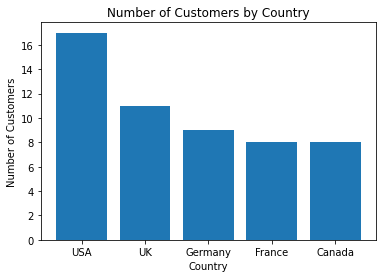

In [24]:
country_counts = df['Country'].value_counts()

plt.bar(country_counts.index, country_counts.values)
plt.title('Number of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')

plt.show()

Calculate the total number of purchases.

In [26]:
print(df['ProductName'].count())
print(len(df))

53
53


Determine the most purchased product.

In [28]:
print(df['ProductName'].mode()[0])

Sunglasses


Determine the most purchased products (top 5)

In [30]:
print(df['ProductName'].value_counts().head(5))

Sunglasses          3
Portable Speaker    2
Watch               2
Home Decorations    2
Desk Lamp           2
Name: ProductName, dtype: int64


Analyze the distribution of purchases by category.

In [33]:
print(df['Category'].value_counts())

Electronics      18
Accessories      10
Clothing          8
Home Decor        7
Furniture         3
Kitchenware       3
Sports            1
Home              1
Office            1
Personal Care     1
Name: Category, dtype: int64


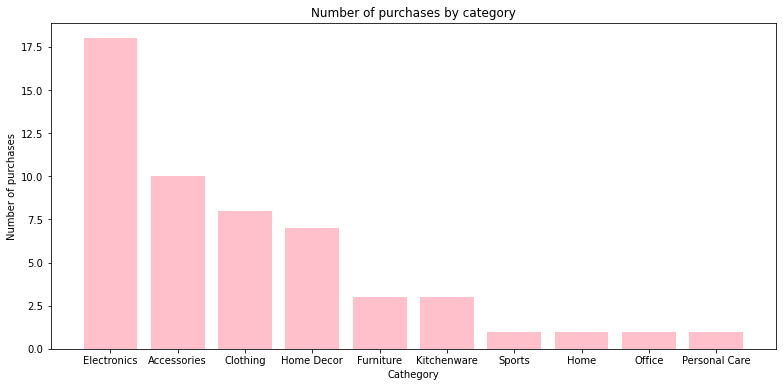

In [37]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(13, 6))
plt.bar(category_counts.index, category_counts.values, color= "pink")
plt.title('Number of purchases by category')
plt.xlabel('Cathegory')
plt.ylabel('Number of purchases')

plt.show()

Explore seasonal trends in purchases (e.g., monthly or quarterly sales).

In [40]:
df['Date'] = pd.to_datetime(df['Date'])


df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter


monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['TotalPrice'].sum()

quarterly_sales = df.groupby(df['Date'].dt.to_period('Q'))['TotalPrice'].sum()

print("Monthly Sales Trend:", monthly_sales)

print("Quarterly Sales Trend:", quarterly_sales)

Monthly Sales Trend: Date
2023-01    8130
Freq: M, Name: TotalPrice, dtype: int64
Quarterly Sales Trend: Date
2023Q1    8130
Freq: Q-DEC, Name: TotalPrice, dtype: int64


Calculate total revenue generated.

In [41]:
print(df['TotalPrice'].sum())

8130


Analyze revenue distribution by country.

In [43]:
print(df.groupby(df['Country'])['TotalPrice'].sum())

Country
Canada     1435
France     1340
Germany    1255
UK         1705
USA        2395
Name: TotalPrice, dtype: int64


Determine the average purchase value.

In [44]:
print(df['TotalPrice'].mean())

153.39622641509433


Calculate the average number of items per purchase.

In [45]:
print(df['Quantity'].mean())

1.0188679245283019


Aggregate sales data at the product level to calculate product performance metrics.
Identify best-selling products based on sales quantity or revenue.
Analyze product categories and their contribution to overall sales.
Explore cross-selling patterns by identifying frequently co-purchased products.
Visualize product trends and correlations using Matplotlib.